<a href="https://colab.research.google.com/github/IrynaTkachenko/ai-experience/blob/main/ffl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from PIL import Image, ImageFilter, ImageDraw, ImageFont, ImageEnhance
from operator import itemgetter

def get_station():
  return [
          'Академмістечко',# 0
          'Житомирська',   #1
          'Святошин',
          'Нивки',
          'Берестейська',
          'Шулявська',
          'Політехнічний інститут',
          'Вокзальна',
          'Університет',
          'Театральна',
          'Хрещатик',  #10
          'Арсенальна',
          'Дніпро',
          'Гідропарк',
          'Лівобережна',
          'Дарниця',
          'Чернігівська',
          'Лісова' #17
          ]

def get_ruck():
  rucks = [
          [0, -1], # Место грузчика
          [1, 17], 
          [2, 17], 
          [3, 17], 
          [4, 17], 
          [5, 17], 
          [6, 17], 
          [7, 16], 
          [8, 16], 
          [9, 16], 
          [10, 16],
          [11, 16], 
          [12, 15], 
          [13, 15], 
          [14, 15],
          [15, 14],
          [16, 14], 
          [17, 13],
          [18, 13],
          [19, 13],
          [20, 13],
          [21, 12], 
          [22, 12],
          [23, 11],
          [24, 11],
          [25, 11],
          [26, 10],
          [27, 10],
          [28, 10],
          [29, 10],
          [30, 9],
          [31, 9],
          [32, 9],
          [33, 9],
          [34, 9],
          [35, 8],
          [36, 8],
          [37, 7],
          [38, 7],
          [39, 7],
          [40, 7],
          [41, 6],
          [42, 6],
          [43, 6],
          [44, 5],
          [45, 5],
          [46, 4],
          [47, 4],
          [48, 4],
          [49, 4],
          [50, 4],
          [51, 3],
          [52, 3],
          [53, 3],
          [54, 3],
          [55, 3],
          [56, 3],
          [57, 3],
          [58, 3],
          [59, 2],
          [60, 2],
          [61, 2],
          [62, 1],
          [63, 1],
          ]
  rucks = sorted(rucks, key=itemgetter(1))
  print(rucks)
  return rucks

def draw_rec(car, place, line, place_number, ruck_number):
  ttf=ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', 8)
  ttf_b=ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', 16)

  x_span = 167
  y_span = 131
  w, h = 34, 82

  x = (w*(place - 1)) + x_span
  y = (h*(line - 1)) + y_span
  shape = [(x + 1,y + 3), (x + w - 1, y +h -1)]

  ImageDraw.Draw(car).text((x + 3, y +15), 'Місце',"blue", font=ttf)
  ImageDraw.Draw(car).text((x + 10, y + 30), (str(place_number)),"blue", font=ttf_b)
  ImageDraw.Draw(car).rectangle(shape, outline ="blue")

  if (ruck_number[0] > 0):
    ImageDraw.Draw(car).text((x + 1, y + 50), 'Стелаж',"#ff0000", font=ttf)
    ImageDraw.Draw(car).text((x + 10, y + 60), (str(ruck_number[0])),"#ff0000", font=ttf_b)
    ImageDraw.Draw(car).rectangle(shape, outline ="red")# fill ="#ffff33"

def put_ruck_to_car(car, rucks):
  line_lenth = 32
  line_count = 2
  #rucks = (line_lenth)* line_count

  ruck_ident = 0
  for line in range(1,line_count + 1):
    for place in range(1,line_lenth + 1):  
      place_number = (place + ((line - 1) * (line_lenth)))
      place_number_right = (place + 
                    ((line_count - line) * (line_lenth)))   
      draw_rec(car, place, line, place_number_right, rucks[place_number_right - 1]) #      
      ruck_ident = ruck_ident + 1

def get_empty_car(name = ''):
  w = 1325
  h = 384
  try:
        ttf=ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', 22)
        # загружаем изображение с жесткого диска
        car = Image.open("car_empty.png")
        ImageDraw.Draw(car).text((50, 1), name ,"red", font=ttf)
  except FileNotFoundError:        
        car= Image.new('RGB', (w, h), 'lightgray')
        shape = [(1,1), (w - 1, h -1)]
        ImageDraw.Draw(car).rectangle(shape, outline ="black")# fill ="#ffff33"
        print("Файл не найден")
  return car

def simple():
  car = get_empty_car()
  line_lenth = 32
  ruck_ident = 0
  line = 1
  for place in range(1,line_lenth + 1):  
      place_number = (place + ((line - 1) * (line_lenth)))
      draw_rec(car, place, line, place_number, [place_number, place_number]) #      
      ruck_ident = ruck_ident + 1
  car.save("out_simple.png")

def target():
  car = get_empty_car()  
  rucks = get_ruck()     
  put_ruck_to_car(car, rucks)      
  car.save("out.png")

  print('Маршрутний лист')
  for s in range(len(get_station())):
    rucks_for_station =  [r for r in rucks if r[1] == s] 
    if len(rucks_for_station) > 0:
      tmpr = []
      for r in range(len(rucks_for_station)):
        tmpr.append(str(rucks_for_station[r][0]))
      print('Станція',get_station()[s], "cтелаж(і): ", ','.join(tmpr))
    else:
      print('Станція',get_station()[s], "порожня множина")  
simple()      
target()

[[0, -1], [62, 1], [63, 1], [59, 2], [60, 2], [61, 2], [51, 3], [52, 3], [53, 3], [54, 3], [55, 3], [56, 3], [57, 3], [58, 3], [46, 4], [47, 4], [48, 4], [49, 4], [50, 4], [44, 5], [45, 5], [41, 6], [42, 6], [43, 6], [37, 7], [38, 7], [39, 7], [40, 7], [35, 8], [36, 8], [30, 9], [31, 9], [32, 9], [33, 9], [34, 9], [26, 10], [27, 10], [28, 10], [29, 10], [23, 11], [24, 11], [25, 11], [21, 12], [22, 12], [17, 13], [18, 13], [19, 13], [20, 13], [15, 14], [16, 14], [12, 15], [13, 15], [14, 15], [7, 16], [8, 16], [9, 16], [10, 16], [11, 16], [1, 17], [2, 17], [3, 17], [4, 17], [5, 17], [6, 17]]
Маршрутний лист
Станція Академмістечко порожня множина
Станція Житомирська cтелаж(і):  62,63
Станція Святошин cтелаж(і):  59,60,61
Станція Нивки cтелаж(і):  51,52,53,54,55,56,57,58
Станція Берестейська cтелаж(і):  46,47,48,49,50
Станція Шулявська cтелаж(і):  44,45
Станція Політехнічний інститут cтелаж(і):  41,42,43
Станція Вокзальна cтелаж(і):  37,38,39,40
Станція Університет cтелаж(і):  35,36
Станці

In [65]:
def plan_upload():
    rucks = get_ruck()
    line_lenth = 32
    line_count = 2
    ruck_ident = 0
    plan = []
    for line in range(1,line_count + 1):
      for place in range(1,line_lenth + 1):  
        place_number = (place + ((line - 1) * (line_lenth)))
        place_number_right = (place + 
                      ((line_count - line) * (line_lenth)))   
        plan.append([place_number_right, rucks[place_number_right - 1][0]]) #      
        ruck_ident = ruck_ident + 1
    plan = sorted(plan, key=itemgetter(0), reverse=True)
    print('План завантаження')
    print('Виконайте переміщення')
    for item in plan:
      if item[1] > 0:
        print('стелажа', item[1], ' на місце', item[0])
plan_upload()        

[[0, -1], [62, 1], [63, 1], [59, 2], [60, 2], [61, 2], [51, 3], [52, 3], [53, 3], [54, 3], [55, 3], [56, 3], [57, 3], [58, 3], [46, 4], [47, 4], [48, 4], [49, 4], [50, 4], [44, 5], [45, 5], [41, 6], [42, 6], [43, 6], [37, 7], [38, 7], [39, 7], [40, 7], [35, 8], [36, 8], [30, 9], [31, 9], [32, 9], [33, 9], [34, 9], [26, 10], [27, 10], [28, 10], [29, 10], [23, 11], [24, 11], [25, 11], [21, 12], [22, 12], [17, 13], [18, 13], [19, 13], [20, 13], [15, 14], [16, 14], [12, 15], [13, 15], [14, 15], [7, 16], [8, 16], [9, 16], [10, 16], [11, 16], [1, 17], [2, 17], [3, 17], [4, 17], [5, 17], [6, 17]]
План завантаження
Виконайте переміщення
стелажа 6  на місце 64
стелажа 5  на місце 63
стелажа 4  на місце 62
стелажа 3  на місце 61
стелажа 2  на місце 60
стелажа 1  на місце 59
стелажа 11  на місце 58
стелажа 10  на місце 57
стелажа 9  на місце 56
стелажа 8  на місце 55
стелажа 7  на місце 54
стелажа 14  на місце 53
стелажа 13  на місце 52
стелажа 12  на місце 51
стелажа 16  на місце 50
стелажа 15  

[[0, -1], [62, 1], [63, 1], [59, 2], [60, 2], [61, 2], [51, 3], [52, 3], [53, 3], [54, 3], [55, 3], [56, 3], [57, 3], [58, 3], [46, 4], [47, 4], [48, 4], [49, 4], [50, 4], [44, 5], [45, 5], [41, 6], [42, 6], [43, 6], [37, 7], [38, 7], [39, 7], [40, 7], [35, 8], [36, 8], [30, 9], [31, 9], [32, 9], [33, 9], [34, 9], [26, 10], [27, 10], [28, 10], [29, 10], [23, 11], [24, 11], [25, 11], [21, 12], [22, 12], [17, 13], [18, 13], [19, 13], [20, 13], [15, 14], [16, 14], [12, 15], [13, 15], [14, 15], [7, 16], [8, 16], [9, 16], [10, 16], [11, 16], [1, 17], [2, 17], [3, 17], [4, 17], [5, 17], [6, 17]]


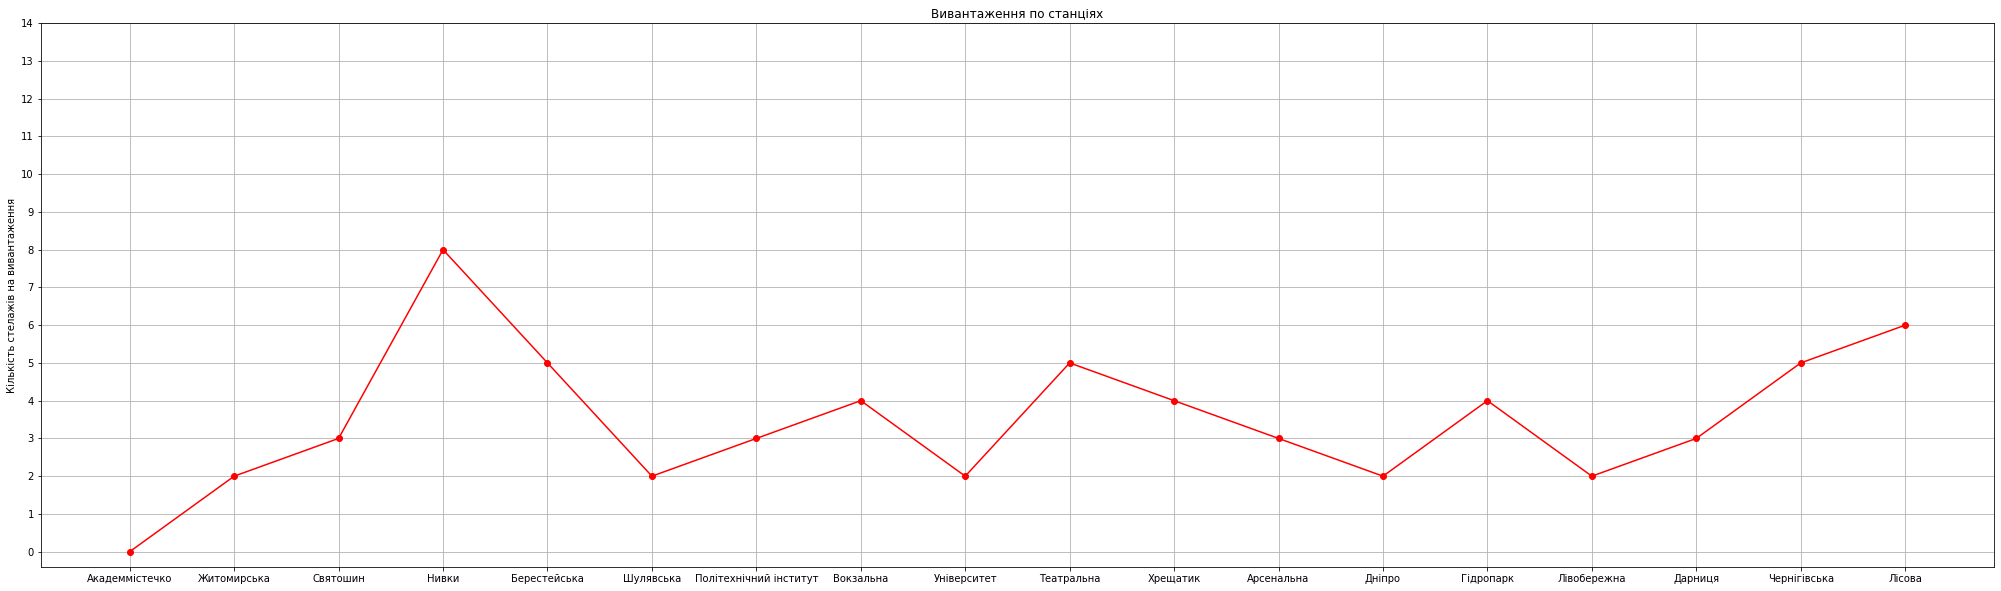

In [66]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,10)

stations = get_station()
rucks_for_station = []
rucks = get_ruck()
for s in range(len(stations)):  
  rucks_for_station.append(len([r for r in rucks if r[1] == s]))
  
plt.plot(stations,rucks_for_station, color='red', marker='o')
plt.title('Вивантаження по станціях')
#plt.xlabel('Станція')
plt.ylabel('Кількість стелажів на вивантаження')
plt.grid(True)

yint = range(0, 15)
plt.yticks(yint)

plt.show()

In [67]:
def unloading():
  stations = get_station()
  tmp_rucks = get_ruck() 
  for s in range(len(stations)):
    car = get_empty_car(stations[s])
    for r in range(len(tmp_rucks)):
      if tmp_rucks[r][1] == s:
        tmp_rucks[r][0] = 0
        tmp_rucks[r][1] = -1
    put_ruck_to_car(car, tmp_rucks)  
    #print(stations[s])
    #print(tmp_rucks)  
    car.save('result/' + str(s + 1) + '_' +stations[s] + ".png")
unloading()    

[[0, -1], [62, 1], [63, 1], [59, 2], [60, 2], [61, 2], [51, 3], [52, 3], [53, 3], [54, 3], [55, 3], [56, 3], [57, 3], [58, 3], [46, 4], [47, 4], [48, 4], [49, 4], [50, 4], [44, 5], [45, 5], [41, 6], [42, 6], [43, 6], [37, 7], [38, 7], [39, 7], [40, 7], [35, 8], [36, 8], [30, 9], [31, 9], [32, 9], [33, 9], [34, 9], [26, 10], [27, 10], [28, 10], [29, 10], [23, 11], [24, 11], [25, 11], [21, 12], [22, 12], [17, 13], [18, 13], [19, 13], [20, 13], [15, 14], [16, 14], [12, 15], [13, 15], [14, 15], [7, 16], [8, 16], [9, 16], [10, 16], [11, 16], [1, 17], [2, 17], [3, 17], [4, 17], [5, 17], [6, 17]]


In [68]:
#!zip -r /content/result.zip /content/result